In [5]:
# Import all necessary libraries for HTTP requests, JSON parsing, data manipulation and analysis, web scraping, geospatial analysis, and creating visualizations.
import requests
import json
import pandas as pd
from scrapy import Selector
from scrapy.http import HtmlResponse
import numpy as np
import math
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geopy.distance
from plotnine import ggplot, aes, geom_point, theme_minimal, labs, scale_x_continuous, scale_y_continuous

In [6]:
list_of_locations = [['longitude', 'latitude', 'duration', 'distance', 'index', 'color']] # Initialize a list to store location data with headers for each attribute.
base_row = [51.5134, -0.0890, 0, 0, 0, '0.1,0.8,0'] # Define a base location row with predefined values.
list_of_locations.append(base_row) # Add the base location to the list of locations.

In [7]:
# Define a function to fetch and return the journey duration from a given URL.
def get_duration(url):
    reply = requests.get(url)
    data = reply.json() # Parse the JSON response into a Python dictionary.
    try:
        duration = (data["journeys"][0]["duration"]) # Extract duration from the first journey.
    except ValueError:
        duration = 1000 # Default duration value in case of error.
    return duration

In [8]:
# Define a function to calculate and return an index based on location, base location, and duration.
def get_index(location, base_location, duration):
    distance = geopy.distance.geodesic(location, base_location).km # Calculate geodesic distance.
    index = duration / distance # Calculate index as duration per kilometer.
    return(index)

In [9]:
# Define a function to determine the color based on the index value.
def get_color_from_index(index):
    RGB_value = '1, 0.98, 0.98' # Default RGB color value.
    if index < 2.5:
        RGB_value = '1,0,0'
    for i in range (25): # Iterate to assign colors based on index ranges.
        lower_bound = 2.5 + 0.15 * i 
        upper_bound = 2.5 + 0.15 * (i + 1)
        if lower_bound < index < upper_bound:
            g_and_b_value = (10 * i) / 255
            RGB_value = '1, ' + str(g_and_b_value) + ',' + str(g_and_b_value)
        i += 1
    return(RGB_value)

Looping through all London locations

In [11]:
base_location = [51.5134, -0.0890] # Set the base location coordinates.
current_location = [0,0] # Initialize current location as a placeholder.
error_list = [['longitude', 'latitude']]  # Prepare a list to record locations that result in errors.

# Loop through a grid of points around the base location.
for x in range(20): # Iterate over latitude adjustments.
    for y in range(40):   # Iterate over longitude adjustments.
        # Calculate current location coordinates based on iteration and offset.
        current_location[0] = base_location[0] - 0.02 * 10 + 0.02 * (x+1)
        current_location[1] = base_location[1] - 0.02 * 20 + 0.02 * (y+1)
         # Construct the API URL with current location coordinates.
        current_url = "https://api.tfl.gov.uk/journey/journeyresults/" + str(current_location[0]) + "," + str(current_location[1]) + "/to/51.5134,-0.0890?20240303?app_id={{app_id}}&app_key="
        
        current_row = [current_location[0], current_location[1]]
        try:
            duration = get_duration(current_url) # Attempt to fetch the duration from the API.
        except KeyError:
            current_row.extend([0, 0, 0, '0,0,0']) # Set the colour for error points to black
            list_of_locations.append(current_row)
            error_list.append(current_row) # Log the problematic location and skip further processing.
            continue
        except ValueError:
            current_row.extend([0, 0, 0, '0,0,0'])
            list_of_locations.append(current_row)
            error_list.append(current_row)
            continue
        
        try:
            # Calculate the index and distance for the current location.
            index = get_index(current_location, base_location, duration)
            distance = geopy.distance.geodesic(current_location, base_location).km
            color = get_color_from_index(index) # Determine the color based on the calculated index.
        except ZeroDivisionError: # Handle division by zero if distance is zero.
            color = '1,0,1' # Color for the base location 
        
        # Append calculated values to the temporary list and add it to the main list.
        current_row.extend([duration, distance, index, color])
        list_of_locations.append(current_row)
        print(current_row)

[51.3334, -0.469, 99, 33.161296308399, 2.9854080214266396, '1, 0.11764705882352941,0.11764705882352941']
[51.3334, -0.449, 124, 32.063491561514084, 3.8673267932191644, '1, 0.35294117647058826,0.35294117647058826']
[51.3334, -0.429, 93, 30.98925410552983, 3.0010402858778313, '1, 0.11764705882352941,0.11764705882352941']
[51.3334, -0.409, 80, 29.94112079737464, 2.671910665649321, '1, 0.0392156862745098,0.0392156862745098']
[51.3334, -0.389, 95, 28.921929908443175, 3.284704731002984, '1, 0.19607843137254902,0.19607843137254902']
[51.3334, -0.369, 84, 27.93484955324624, 3.006996684907457, '1, 0.11764705882352941,0.11764705882352941']
[51.3334, -0.349, 76, 26.983403947300268, 2.8165460572888144, '1, 0.0784313725490196,0.0784313725490196']
[51.3334, -0.32899999999999996, 104, 26.071494789945024, 3.9890309641973274, '1, 0.35294117647058826,0.35294117647058826']
[51.3334, -0.289, 92, 24.383843167935396, 3.7729901462366455, '1, 0.3137254901960784,0.3137254901960784']
[51.3334, -0.269, 67, 23.61

[51.35339999999999, 0.17100000000000004, 102, 25.373066053835203, 4.02001081712324, '1, 0.39215686274509803,0.39215686274509803']
[51.35339999999999, 0.19100000000000006, 100, 26.382218575218342, 3.7904317908249454, '1, 0.3137254901960784,0.3137254901960784']
[51.35339999999999, 0.21100000000000008, 94, 27.42479218633117, 3.427555598647368, '1, 0.23529411764705882,0.23529411764705882']
[51.35339999999999, 0.23099999999999998, 97, 28.497118895286032, 3.4038528721598467, '1, 0.23529411764705882,0.23529411764705882']
[51.35339999999999, 0.251, 140, 29.595964743348325, 4.7303746039049095, '1, 0.5490196078431373,0.5490196078431373']
[51.35339999999999, 0.271, 159, 30.718483897820803, 5.176036699235655, '1, 0.6666666666666666,0.6666666666666666']
[51.35339999999999, 0.29100000000000004, 165, 31.862174313157606, 5.178554306378979, '1, 0.6666666666666666,0.6666666666666666']
[51.3734, -0.469, 76, 30.66963560217979, 2.47802096463769, '1,0,0']
[51.3734, -0.449, 90, 29.480244870611696, 3.05289187

[51.39339999999999, 0.051000000000000045, 68, 16.521145243511576, 4.115937424296051, '1, 0.39215686274509803,0.39215686274509803']
[51.39339999999999, 0.07100000000000006, 50, 17.376394701031177, 2.877466865841441, '1, 0.0784313725490196,0.0784313725490196']
[51.39339999999999, 0.09099999999999997, 69, 18.29741473390423, 3.771024541087016, '1, 0.3137254901960784,0.3137254901960784']
[51.39339999999999, 0.11099999999999999, 54, 19.274779301556055, 2.801588498377285, '1, 0.0784313725490196,0.0784313725490196']
[51.39339999999999, 0.131, 79, 20.300351809923512, 3.891558172966346, '1, 0.35294117647058826,0.35294117647058826']
[51.39339999999999, 0.15100000000000002, 70, 21.367191728640456, 3.276050539958062, '1, 0.19607843137254902,0.19607843137254902']
[51.39339999999999, 0.17100000000000004, 41, 22.469421668032087, 1.8247020597923052, '1,0,0']
[51.39339999999999, 0.19100000000000006, 67, 23.602083873837184, 2.8387323915185827, '1, 0.0784313725490196,0.0784313725490196']
[51.3933999999999

[51.43339999999999, -0.20899999999999996, 58, 12.19581043652317, 4.755731511397194, '1, 0.5882352941176471,0.5882352941176471']
[51.43339999999999, -0.189, 49, 11.29142949767842, 4.339574542804759, '1, 0.47058823529411764,0.47058823529411764']
[51.43339999999999, -0.16899999999999998, 44, 10.49366669787878, 4.193005292315439, '1, 0.43137254901960786,0.43137254901960786']
[51.43339999999999, -0.14899999999999997, 44, 9.828518479151814, 4.476768303720698, '1, 0.5098039215686274,0.5098039215686274']
[51.43339999999999, -0.129, 45, 9.324408039956078, 4.826043627345589, '1, 0.5882352941176471,0.5882352941176471']
[51.43339999999999, -0.10899999999999999, 49, 9.00841111894533, 5.439360987527479, '1, 0.7450980392156863,0.7450980392156863']
[51.43339999999999, -0.08899999999999997, 51, 8.900586087671634, 5.729959746206044, '1, 0.8235294117647058,0.8235294117647058']
[51.43339999999999, -0.069, 53, 9.00841111894533, 5.88339045589707, '1, 0.8627450980392157,0.8627450980392157']
[51.4333999999999

[51.47339999999999, -0.469, 77, 26.763769383538335, 2.8770237441726203, '1, 0.0784313725490196,0.0784313725490196']
[51.47339999999999, -0.449, 59, 25.39515057584028, 2.3232782110821484, '1,0,0']
[51.47339999999999, -0.409, 79, 22.665354297965987, 3.485495923048048, '1, 0.23529411764705882,0.23529411764705882']
[51.47339999999999, -0.389, 66, 21.305130526936512, 3.0978453718720402, '1, 0.11764705882352941,0.11764705882352941']
[51.47339999999999, -0.369, 67, 19.948873588525824, 3.3585856215228613, '1, 0.19607843137254902,0.19607843137254902']
[51.47339999999999, -0.349, 64, 18.597451483216837, 3.441331736112146, '1, 0.23529411764705882,0.23529411764705882']
[51.47339999999999, -0.32899999999999996, 60, 17.25200055980614, 3.477857526841757, '1, 0.23529411764705882,0.23529411764705882']
[51.47339999999999, -0.309, 64, 15.914035502812423, 4.02160721513343, '1, 0.39215686274509803,0.39215686274509803']
[51.47339999999999, -0.289, 58, 14.585616647550836, 3.9765202528985397, '1, 0.3529411764

[51.493399999999994, 0.17100000000000004, 65, 18.18979570872856, 3.5734321067063486, '1, 0.27450980392156865,0.27450980392156865']
[51.493399999999994, 0.19100000000000006, 119, 19.568807798139947, 6.081106280338202, '1, 0.9019607843137255,0.9019607843137255']
[51.493399999999994, 0.21100000000000008, 114, 20.949100102743746, 5.441761194556953, '1, 0.7450980392156863,0.7450980392156863']
[51.493399999999994, 0.23099999999999998, 92, 22.330435131762723, 4.1199376302855635, '1, 0.39215686274509803,0.39215686274509803']
[51.493399999999994, 0.251, 74, 23.712630565920254, 3.120699738237927, '1, 0.1568627450980392,0.1568627450980392']
[51.493399999999994, 0.271, 90, 25.09554414454403, 3.586294024214921, '1, 0.27450980392156865,0.27450980392156865']
[51.493399999999994, 0.29100000000000004, 98, 26.479063253842366, 3.701037270862641, '1, 0.3137254901960784,0.3137254901960784']
[51.493399999999994, 0.31100000000000005, 103, 27.863097597016385, 3.696645702846383, '1, 0.27450980392156865,0.27450

[51.53339999999999, 0.11099999999999999, 49, 14.058204566353622, 3.4855091038634307, '1, 0.23529411764705882,0.23529411764705882']
[51.53339999999999, 0.131, 55, 15.430367896911106, 3.5643997840783856, '1, 0.27450980392156865,0.27450980392156865']
[51.53339999999999, 0.15100000000000002, 56, 16.805148356258325, 3.332312147018048, '1, 0.19607843137254902,0.19607843137254902']
[51.53339999999999, 0.17100000000000004, 56, 18.181952201166386, 3.079977297289757, '1, 0.11764705882352941,0.11764705882352941']
[51.53339999999999, 0.19100000000000006, 54, 19.56035208133315, 2.7606865037737904, '1, 0.0392156862745098,0.0392156862745098']
[51.53339999999999, 0.21100000000000008, 72, 20.94003272422281, 3.4383900420896922, '1, 0.23529411764705882,0.23529411764705882']
[51.53339999999999, 0.23099999999999998, 90, 22.32075653982494, 4.032121395142723, '1, 0.39215686274509803,0.39215686274509803']
[51.53339999999999, 0.251, 87, 23.702341132069627, 3.670523494503574, '1, 0.27450980392156865,0.274509803

[51.57339999999999, -0.04899999999999999, 54, 7.229321008539481, 7.469581159311318, '1, 0.98, 0.98']
[51.57339999999999, -0.02899999999999997, 40, 7.86693909072586, 5.084569683163686, '1, 0.6666666666666666,0.6666666666666666']
[51.57339999999999, -0.009000000000000008, 36, 8.681280863331388, 4.1468535077651225, '1, 0.39215686274509803,0.39215686274509803']
[51.57339999999999, 0.01100000000000001, 37, 9.627606221183761, 3.8431152199171135, '1, 0.3137254901960784,0.3137254901960784']
[51.57339999999999, 0.031000000000000028, 33, 10.670858528207484, 3.0925346740159076, '1, 0.11764705882352941,0.11764705882352941']
[51.57339999999999, 0.051000000000000045, 40, 11.785325467812921, 3.394051365763686, '1, 0.19607843137254902,0.19607843137254902']
[51.57339999999999, 0.07100000000000006, 39, 12.952637709750084, 3.0109697247721825, '1, 0.11764705882352941,0.11764705882352941']
[51.57339999999999, 0.09099999999999997, 46, 14.159731683355831, 3.2486491289994617, '1, 0.1568627450980392,0.15686274

[51.61339999999999, -0.269, 60, 16.720775462477224, 3.5883503211106964, '1, 0.27450980392156865,0.27450980392156865']
[51.61339999999999, -0.249, 45, 15.712602471498581, 2.8639431361944303, '1, 0.0784313725490196,0.0784313725490196']
[51.61339999999999, -0.22899999999999998, 61, 14.765984293988424, 4.131116408191936, '1, 0.39215686274509803,0.39215686274509803']
[51.61339999999999, -0.20899999999999996, 57, 13.89350860842564, 4.102635382212429, '1, 0.39215686274509803,0.39215686274509803']
[51.61339999999999, -0.189, 53, 13.109986504301377, 4.042719646020287, '1, 0.39215686274509803,0.39215686274509803']
[51.61339999999999, -0.16899999999999998, 57, 12.432247899063677, 4.5848506611819495, '1, 0.5098039215686274,0.5098039215686274']
[51.61339999999999, -0.14899999999999997, 53, 11.878413521551424, 4.461875308839875, '1, 0.5098039215686274,0.5098039215686274']
[51.61339999999999, -0.129, 51, 11.466451371070773, 4.447757928723283, '1, 0.47058823529411764,0.47058823529411764']
[51.61339999

[51.6534, -0.469, 106, 30.60019546407622, 3.4640301603445987, '1, 0.23529411764705882,0.23529411764705882']
[51.6534, -0.449, 80, 29.415429812882316, 2.7196610931370606, '1, 0.0392156862745098,0.0392156862745098']
[51.6534, -0.429, 71, 28.249009069055507, 2.5133624980061593, '1, 0.0,0.0']
[51.6534, -0.409, 80, 27.103301909397135, 2.9516698838919977, '1, 0.11764705882352941,0.11764705882352941']
[51.6534, -0.389, 68, 25.981048840362092, 2.617292335571942, '1, 0.0,0.0']
[51.6534, -0.369, 76, 24.885423267446086, 3.0539966784257815, '1, 0.11764705882352941,0.11764705882352941']
[51.6534, -0.349, 74, 23.820099823985263, 3.1066200623343696, '1, 0.1568627450980392,0.1568627450980392']
[51.6534, -0.32899999999999996, 89, 22.789328555281198, 3.9053366484277197, '1, 0.35294117647058826,0.35294117647058826']
[51.6534, -0.309, 80, 21.798011742392713, 3.6700594965006013, '1, 0.27450980392156865,0.27450980392156865']
[51.6534, -0.289, 56, 20.851777350951306, 2.685622384004841, '1, 0.0392156862745098

[51.673399999999994, 0.19100000000000006, 117, 26.33233089284451, 4.443207115849867, '1, 0.47058823529411764,0.47058823529411764']
[51.673399999999994, 0.21100000000000008, 139, 27.36965004403142, 5.078618096189802, '1, 0.6666666666666666,0.6666666666666666']
[51.673399999999994, 0.23099999999999998, 122, 28.43669485144662, 4.290231359070678, '1, 0.43137254901960786,0.43137254901960786']
[51.673399999999994, 0.251, 99, 29.530243097875648, 3.3524952595842965, '1, 0.19607843137254902,0.19607843137254902']
[51.673399999999994, 0.271, 173, 30.6474577873218, 5.644840143040066, '1, 0.7843137254901961,0.7843137254901961']
[51.673399999999994, 0.29100000000000004, 87, 31.785843441097498, 2.737067530116674, '1, 0.0392156862745098,0.0392156862745098']
[51.673399999999994, 0.31100000000000005, 162, 32.943205299587376, 4.917554273385447, '1, 0.6274509803921569,0.6274509803921569']
[51.6934, -0.469, 131, 33.078862901899384, 3.960232864971849, '1, 0.35294117647058826,0.35294117647058826']
[51.6934, 

[51.71339999999999, 0.09099999999999997, 102, 25.507012696119293, 3.998900271669938, '1, 0.35294117647058826,0.35294117647058826']
[51.71339999999999, 0.11099999999999999, 66, 26.212071942919074, 2.5179238079204658, '1, 0.0,0.0']
[51.71339999999999, 0.131, 70, 26.969911890512677, 2.5954849346253965, '1, 0.0,0.0']
[51.71339999999999, 0.15100000000000002, 71, 27.776212650151045, 2.556144024898726, '1, 0.0,0.0']
[51.71339999999999, 0.17100000000000004, 70, 28.626879635219993, 2.445254281709354, '1,0,0']
[51.71339999999999, 0.19100000000000006, 150, 29.518077328629577, 5.081631785499628, '1, 0.6666666666666666,0.6666666666666666']
[51.71339999999999, 0.21100000000000008, 85, 30.446246729207733, 2.791805530448444, '1, 0.0392156862745098,0.0392156862745098']
[51.71339999999999, 0.23099999999999998, 73, 31.40811018882274, 2.3242404449401937, '1,0,0']
[51.71339999999999, 0.251, 81, 32.400666998337236, 2.4999485351383917, '1,0,0']
[51.71339999999999, 0.271, 102, 33.42118256534449, 3.05195663859

### Drawing the map of transport efficiency

In [12]:
df = pd.DataFrame(list_of_locations) # Convert the list of location data into a pandas DataFrame for easier manipulation and analysis.
df.to_csv('data/locations.csv', index=False, header = None) # Save the DataFrame to a CSV file named 'locations.csv' in the 'data' directory.

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<Axes: >

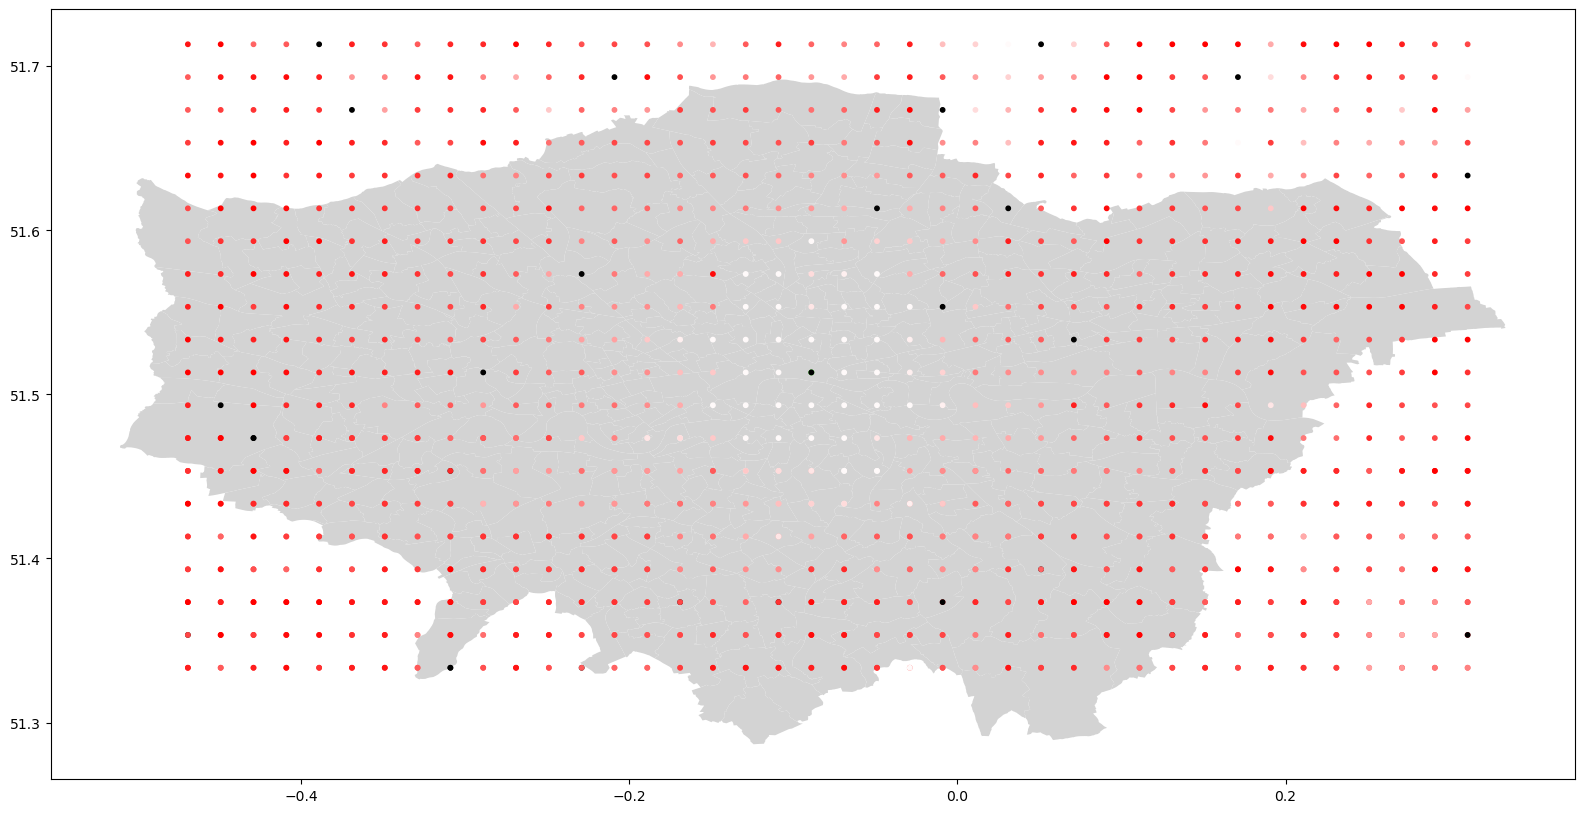

In [13]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load the London map shapefile into a GeoDataFrame. This shapefile contains geometries of London wards.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Convert the geometry of the London map to the WGS84 latitude-longitude coordinate system (EPSG:4326).

df = pd.read_csv("data/locations.csv", delimiter=',', skiprows=0, low_memory=False) # Load the location data from a CSV file into a pandas DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the London map as a base layer with a light grey color for wards.
geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])] # Create Point geometries from the latitude and longitude columns in the DataFrame.
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame from the DataFrame and the geometry list.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['color']] # Split the 'color' column's string values into RGB float tuples for plotting.

# Overlay the location data on the London map, coloring each point based on the 'color' attribute.
gdf.plot(
    ax = ax,
    markersize=10,
    color = gdf['color']
)

### Which places cannot be inputted into the TfL Journey Planner?

In [ ]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load the London map shapefile into a GeoDataFrame. This shapefile contains geometries of London wards.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Convert the geometry of the London map to the WGS84 latitude-longitude coordinate system (EPSG:4326).

df = pd.read_csv("data/locations.csv", delimiter=',', skiprows=0, low_memory=False) # Load the location data from a CSV file into a pandas DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the London map as a base layer with a light grey color for wards.
geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])] # Create Point geometries from the latitude and longitude columns in the DataFrame.
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame from the DataFrame and the geometry list.

# Overlay the location data on the London map, coloring each point based on the 'color' attribute.
gdf.plot(
    ax = ax,
    markersize=10,
    color = 'black'
)

### Scatterplots

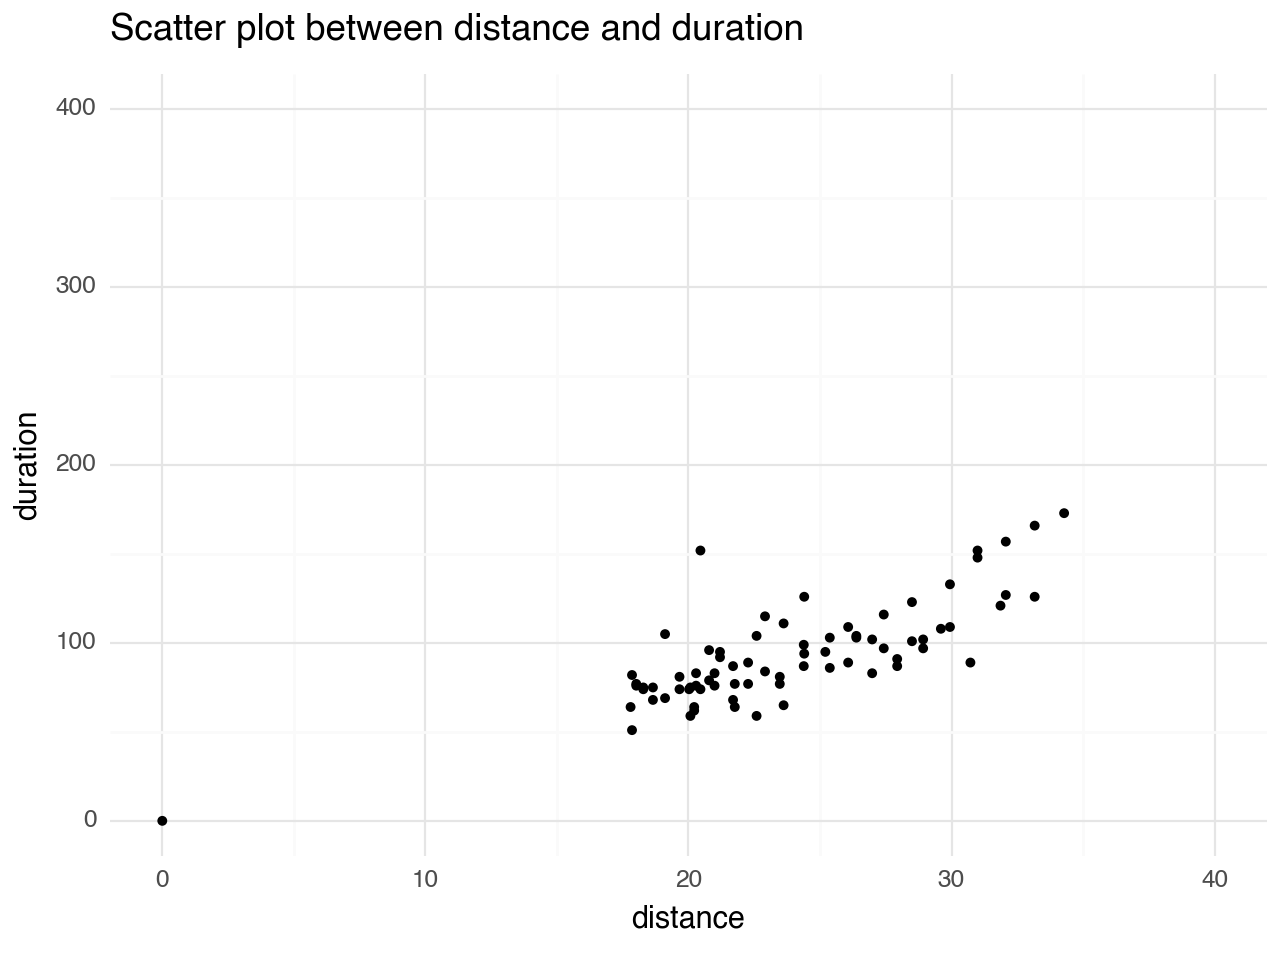

In [10]:
# Create a plot with the data from the DataFrame 'df'. Specify aesthetics (aes), mapping 'distance' to the x-axis and 'duration' to the y-axis.
plot = (
    ggplot(df, aes(x='distance', y='duration')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and duration") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 100, 200, 300, 400], limits=(0, 400))
)

print(plot)

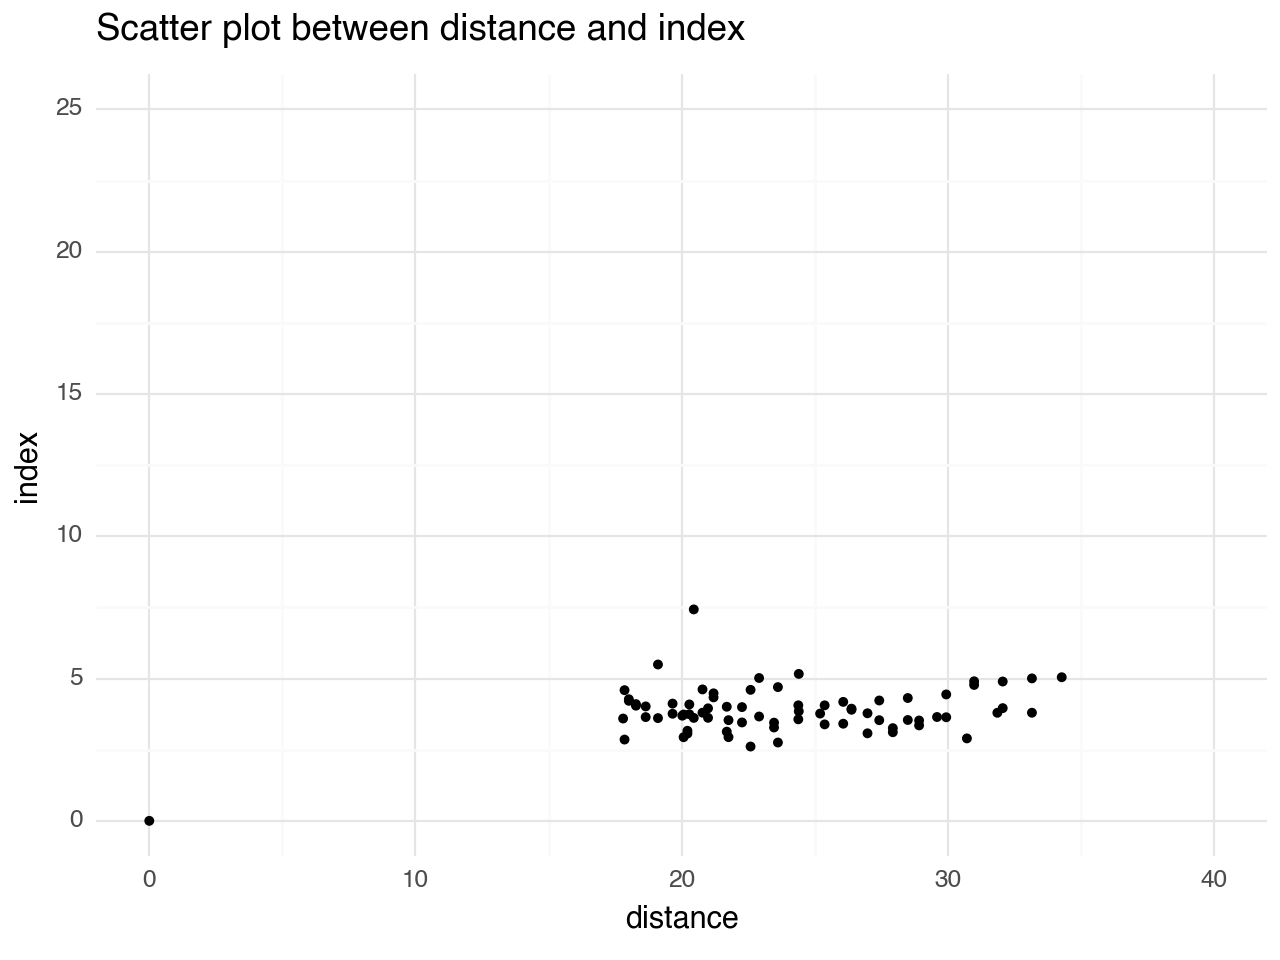

In [11]:
# Create a scatter plot to examine how the 'index' (presumably a measure of efficiency or some other metric) varies with distance.
plot = (
    ggplot(df, aes(x='distance', y='index')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and index") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 5, 10, 15, 20, 25], limits=(0, 25))
)

print(plot)

## Analysis by time

In [84]:
time_of_day = [['longitude', 'latitude', 'duration', 'distance', 'index', 'color']] # Initialize a list to store data with a focus on analysis by time of day. 
base_row = [51.5134, -0.0890, 0, 0, 0, '0.1,0.8,0'] # Define a base row with initial values, including coordinates for a specific location (presumably in London),
time_of_day.append(base_row) # Append the base row to the 'time_of_day' list, setting up the initial state for further data additions.

In [85]:
base_location = [51.5134, -0.0890] # Set the base location coordinates for comparison.
current_location = [0,0] # Initialize the current location with a placeholder value.
y = 1 # Initialize the variable 'y' for use in the loop. Note: this is overwritten by the loop.

# Nested loop to iterate through a grid of points around the base location.
for x in range(10): # Loop over a predefined range in the x-direction.
    for y in range(20): # Loop over a predefined range in the y-direction.
        # Calculate the current location's coordinates based on the loop counters.
        current_location[0] = base_location[0] - 0.04 * 5 + 0.04 * (x+1)
        current_location[1] = base_location[1] - 0.04 * 10 + 0.04 * (y+1)
        
        # Construct the API URL for fetching data for the current location.
        current_url = "https://api.tfl.gov.uk/journey/journeyresults/" + str(current_location[0]) + "," + str(current_location[1]) + "/to/51.5134,-0.0890?app_id={{app_id}}&app_key="
        
        current_row = [current_location[0], current_location[1]]
        
        try:
            duration = get_duration(current_url) # Attempt to fetch the journey duration for the current location.
        except KeyError:
            y = 1
            continue
        except ValueError:
            y = 1 # Reset 'y' if a KeyError occurs and continue to the next iteration.
            continue
        try:
            # Calculate the index and distance using the current location, base location, and duration.
            index = get_index(current_location, base_location, duration)
            distance = geopy.distance.geodesic(current_location, base_location).km
            color = get_color_from_index(index) # Determine the color representation based on the calculated index.
        except ZeroDivisionError:
            color = '1,0,1' # Assign a default color in case of division by zero (i.e., when the current location is the base location).
        
        current_row.extend([duration, distance, index, color])
        time_of_day.append(current_row)

KeyboardInterrupt: 

In [14]:
df = pd.DataFrame(time_of_day)
df.to_csv('data/time_of_day.csv', index=False, header = None)

/Users/zian/miniconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


0                                          0,1,0
1     1, 0.23529411764705882,0.23529411764705882
2     1, 0.23529411764705882,0.23529411764705882
3     1, 0.35294117647058826,0.35294117647058826
4       1, 0.6666666666666666,0.6666666666666666
5       1, 0.5490196078431373,0.5490196078431373
6     1, 0.23529411764705882,0.23529411764705882
7       1, 0.3137254901960784,0.3137254901960784
8     1, 0.27450980392156865,0.27450980392156865
9     1, 0.19607843137254902,0.19607843137254902
10    1, 0.27450980392156865,0.27450980392156865
11    1, 0.43137254901960786,0.43137254901960786
12    1, 0.39215686274509803,0.39215686274509803
13    1, 0.23529411764705882,0.23529411764705882
14    1, 0.27450980392156865,0.27450980392156865
15                                    1, 0.0,0.0
16    1, 0.27450980392156865,0.27450980392156865
17    1, 0.35294117647058826,0.35294117647058826
18      1, 0.5098039215686274,0.5098039215686274
19      1, 0.7843137254901961,0.7843137254901961
20      1, 0.8235294

<Axes: >

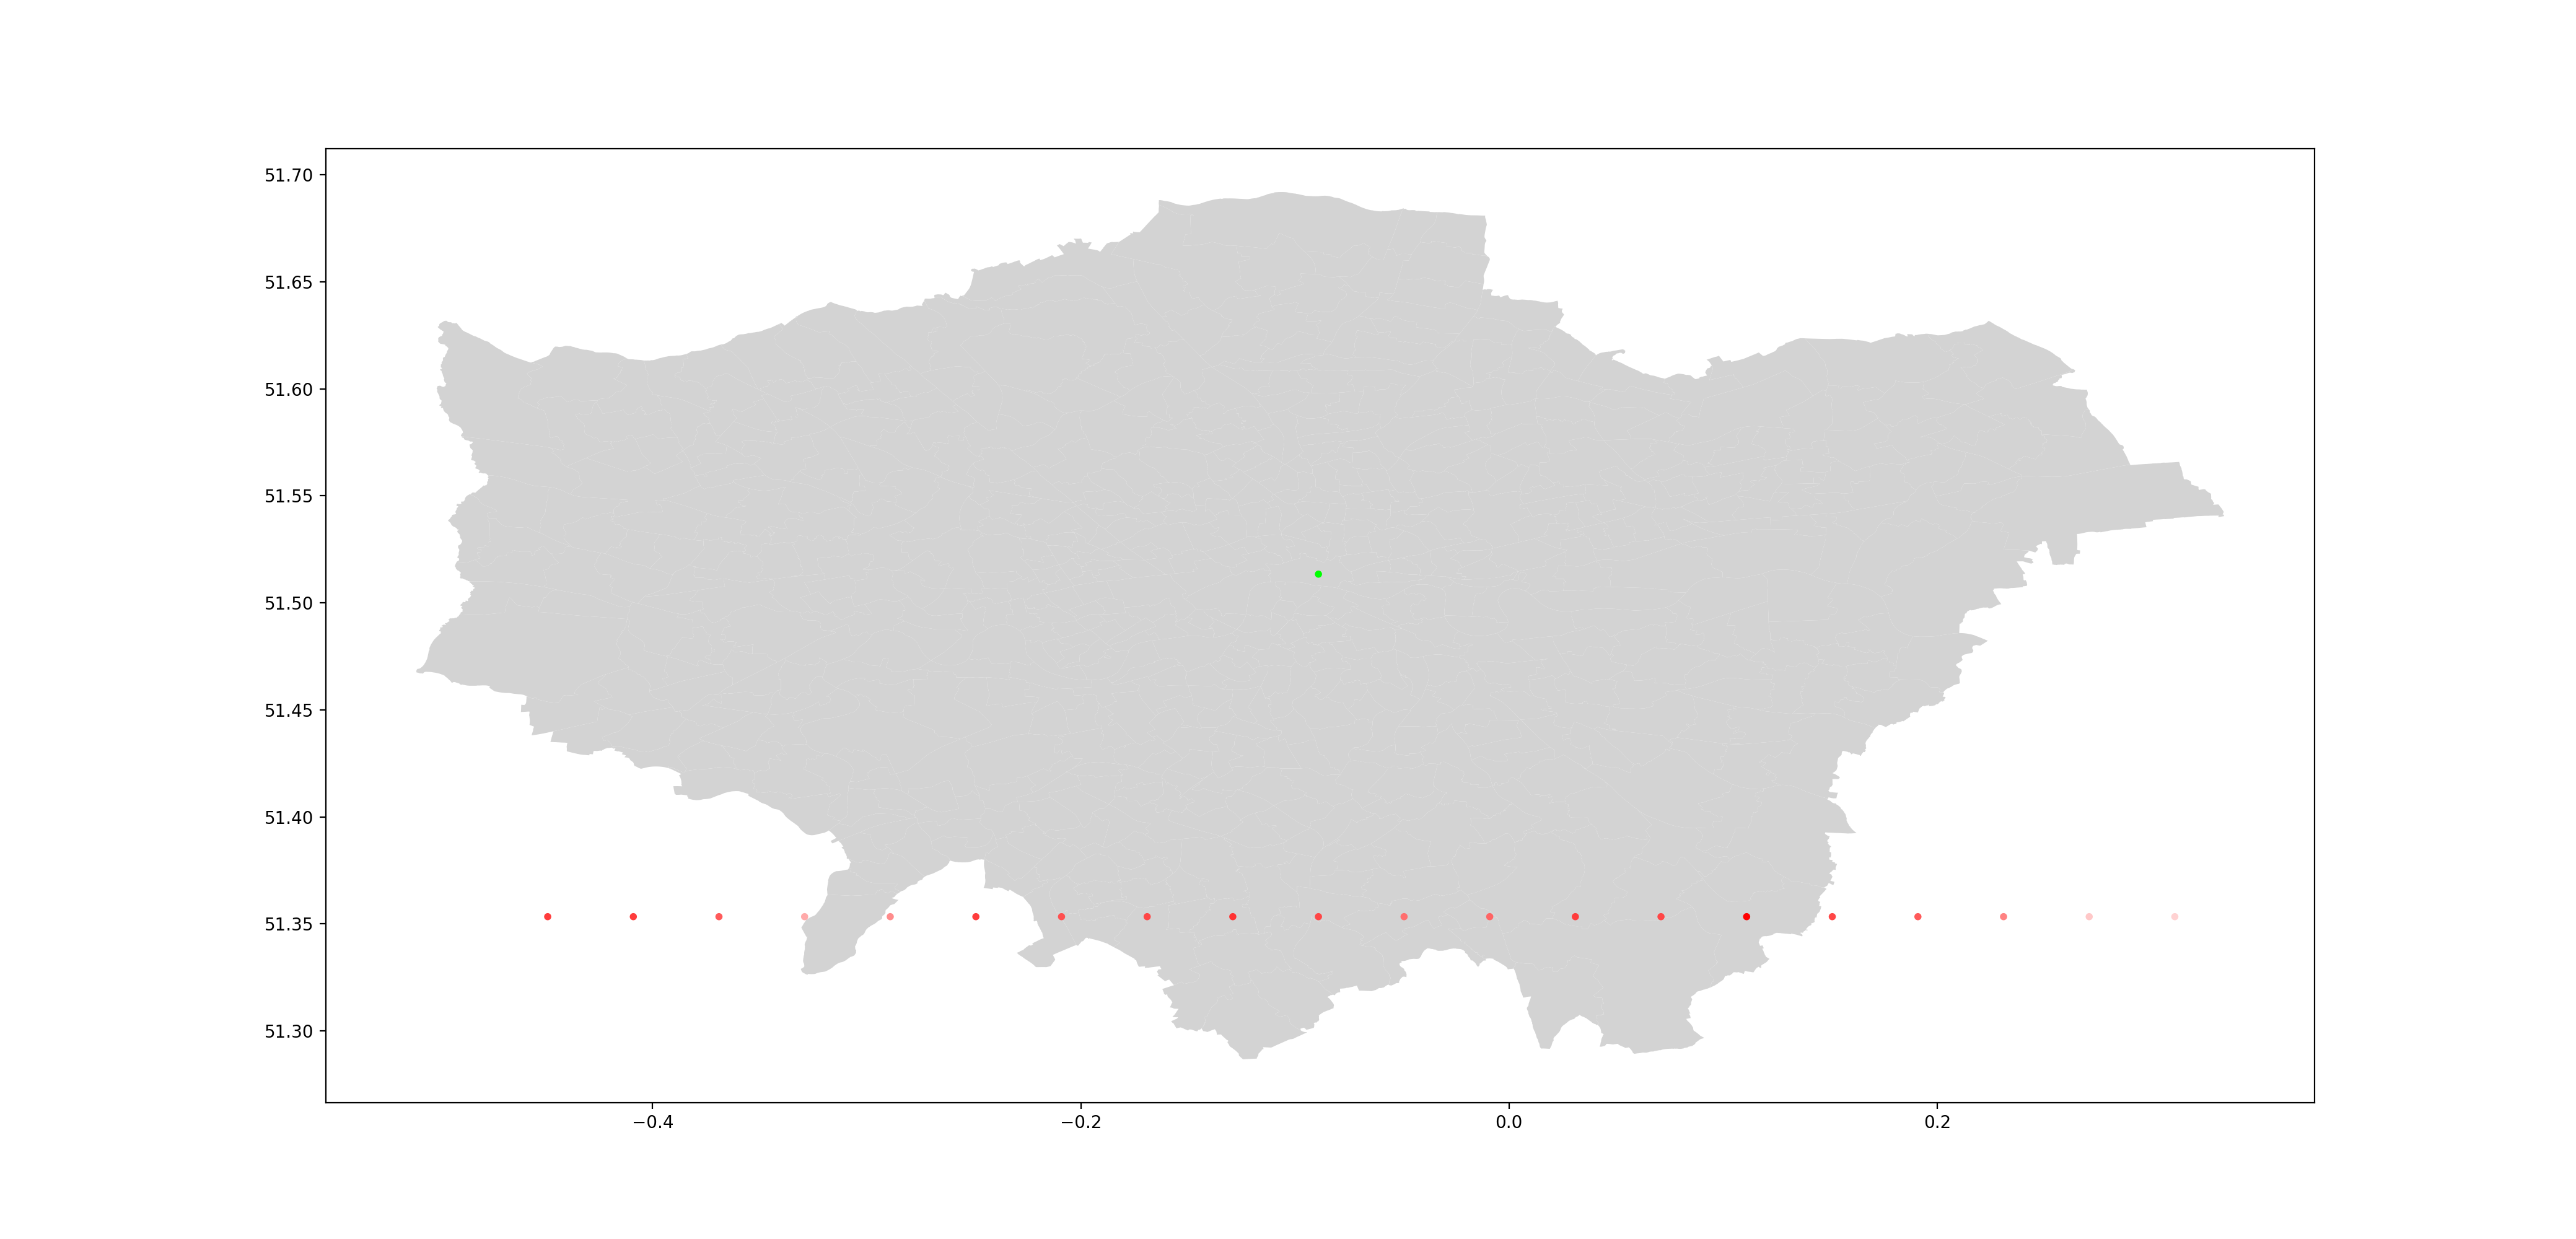

In [15]:
# Read the shapefile containing London's ward boundaries and set its coordinate reference system to WGS84 (EPSG:4326).
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') 
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'})

df = pd.read_csv("data/time_of_day.csv", delimiter=',', skiprows=0, low_memory=False) # Load the 'time_of_day' data from a CSV file into a pandas DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London wards in light grey.

# Create Point geometries from the longitude and latitude columns in the DataFrame.
geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])] 
gdf = GeoDataFrame(df, geometry=geometry)

# Convert the 'color' column values from strings to tuples of floats to use as colors in the plot.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['color']]

# Overlay the points on the base map, using the 'color' column to color each point.
gdf.plot(
    ax = ax,
    markersize=10,
    color = gdf['color']
)

## Tubes only

In [ ]:
tube = [['longitude', 'latitude', 'duration', 'distance', 'index', 'color']] # Initialize a list to store data related to tube travel.
base_row = [51.5134, -0.0890, 0, 0, 0, '0.1,0.8,0'] # Define a base row with default values. This includes the coordinates of a reference point (possibly a central location in London).
tube.append(base_row) # Append the base row to the 'tube' list. This action adds the first set of concrete data to the structure.

In [17]:
base_location = [51.5134, -0.0890] # Define the base location's coordinates.
current_location = [0,0] # Initialize current location coordinates.
y = 1 # Initialize the variable 'y' (though it's immediately overwritten by the loop).

# Double loop to iterate through a grid of points around the base location.
for x in range(20):
    for y in range(40):   
        
        # Calculate the current location's coordinates based on offsets from the base location.
        current_location[0] = base_location[0] - 0.02 * 10 + 0.02 * (x+1)
        current_location[1] = base_location[1] - 0.02 * 20 + 0.02 * (y+1)
        
        # Construct the URL for the TFL API request, specifying 'tube' as the mode of transport.
        current_url = "https://api.tfl.gov.uk/journey/journeyresults/" + str(current_location[0]) + "," + str(current_location[1]) + "/to/51.5134,-0.0890?mode=tube&20240303?app_id={{app_id}}&app_key="
        
        current_row = [current_location[0], current_location[1]]
        
        try:
            duration = get_duration(current_url) # Attempt to get the journey duration from the API.
        except KeyError:
            y = 1 # Skip to the next iteration if a KeyError occurs, resetting 'y' has no effect in this context.
            continue
        except ValueError:
            y = 1 # Skip to the next iteration if a ValueError occurs.
            continue
        
        try:
            # Calculate the index and distance for the current location.
            index = get_index(current_location, base_location, duration)
            distance = geopy.distance.geodesic(current_location, base_location).km
            color = get_color_from_index(index) # Determine the color based on the calculated index.
        except ZeroDivisionError:
            color = '1,0,1' # Color for the base location 
        
        # Append the calculated metrics to the list 'a' and add it to the 'tube' list.
        current_row.extend([duration, distance, index, color])
        tube.append(current_row)

KeyboardInterrupt: 

In [18]:
df = pd.DataFrame(tube)
df.to_csv('data/tube.csv', index=False, header = None)

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


0                                       0.1,0.8,0
1        1, 0.6666666666666666,0.6666666666666666
2      1, 0.39215686274509803,0.39215686274509803
3      1, 0.35294117647058826,0.35294117647058826
4                                   1, 0.98, 0.98
                          ...                    
399    1, 0.35294117647058826,0.35294117647058826
400    1, 0.47058823529411764,0.47058823529411764
401      1, 0.6666666666666666,0.6666666666666666
402      1, 0.9411764705882353,0.9411764705882353
403                                 1, 0.98, 0.98
Name: color, Length: 404, dtype: object


<Axes: >

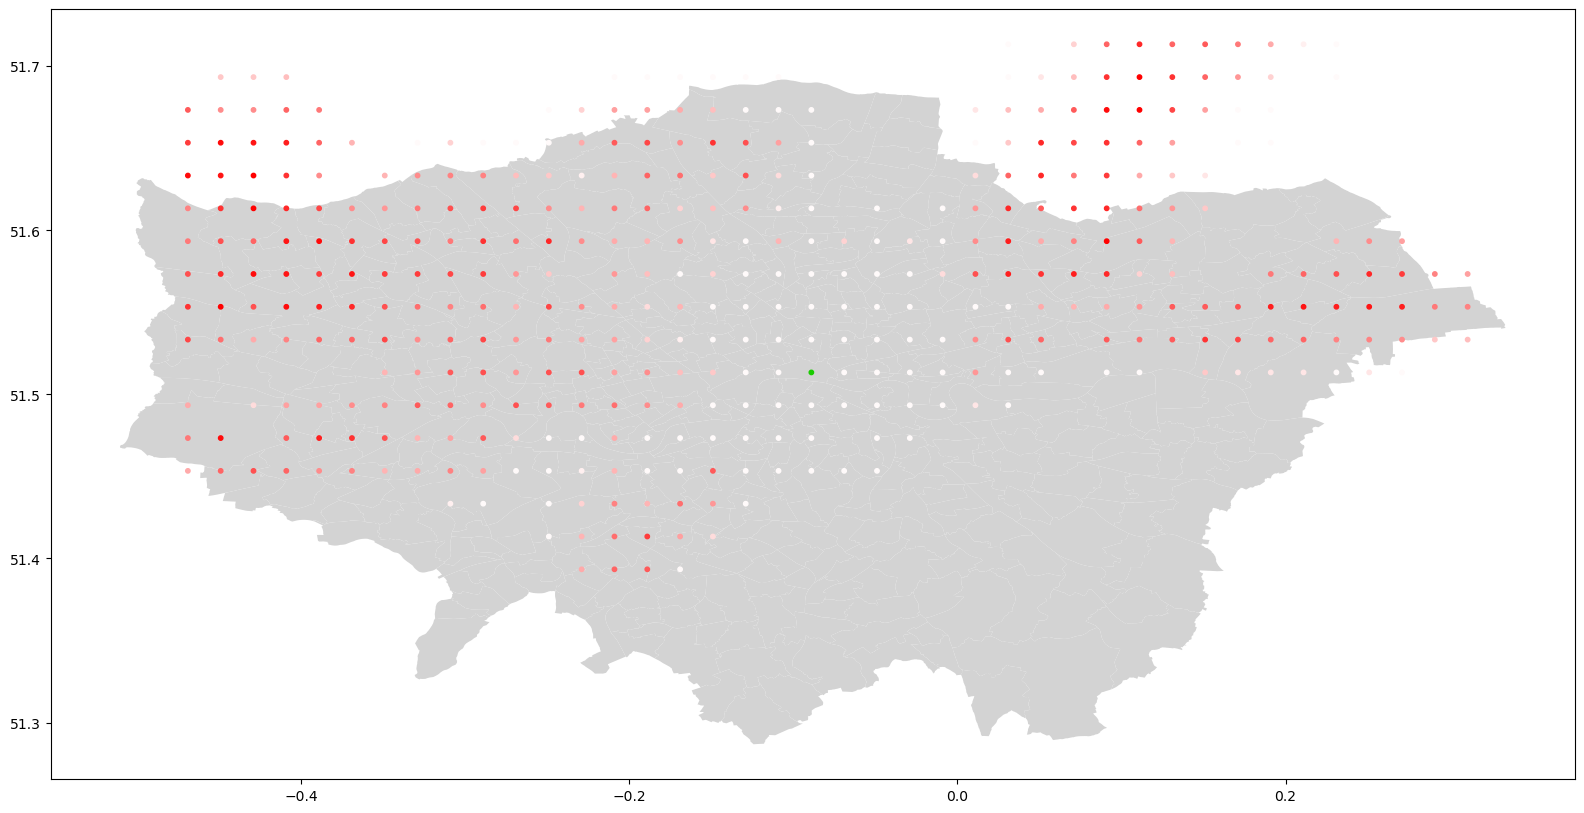

In [54]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load London's ward boundaries as a GeoDataFrame from a shapefile.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Update the coordinate reference system of the GeoDataFrame to WGS84 (EPSG:4326) for geographical coordinates (latitude and longitude).

df = pd.read_csv("data/tube.csv", delimiter=',', skiprows=0, low_memory=False) # Read the tube travel data from a CSV file into a pandas DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London using the ward boundaries. The map is colored light grey for the background.

# Convert the latitude and longitude columns from the DataFrame into Point geometries for plotting.
geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])]
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame that combines the tube data with the corresponding Point geometries.

gdf['color'] = [tuple(map(float, item.split(','))) for item in df['color']] # Convert the string representations in the 'color' column to tuples of floats.

# Overlay the tube journey data points on the base map of London.
gdf.plot(
    ax = ax,
    markersize=10,
    color = gdf['color']
)

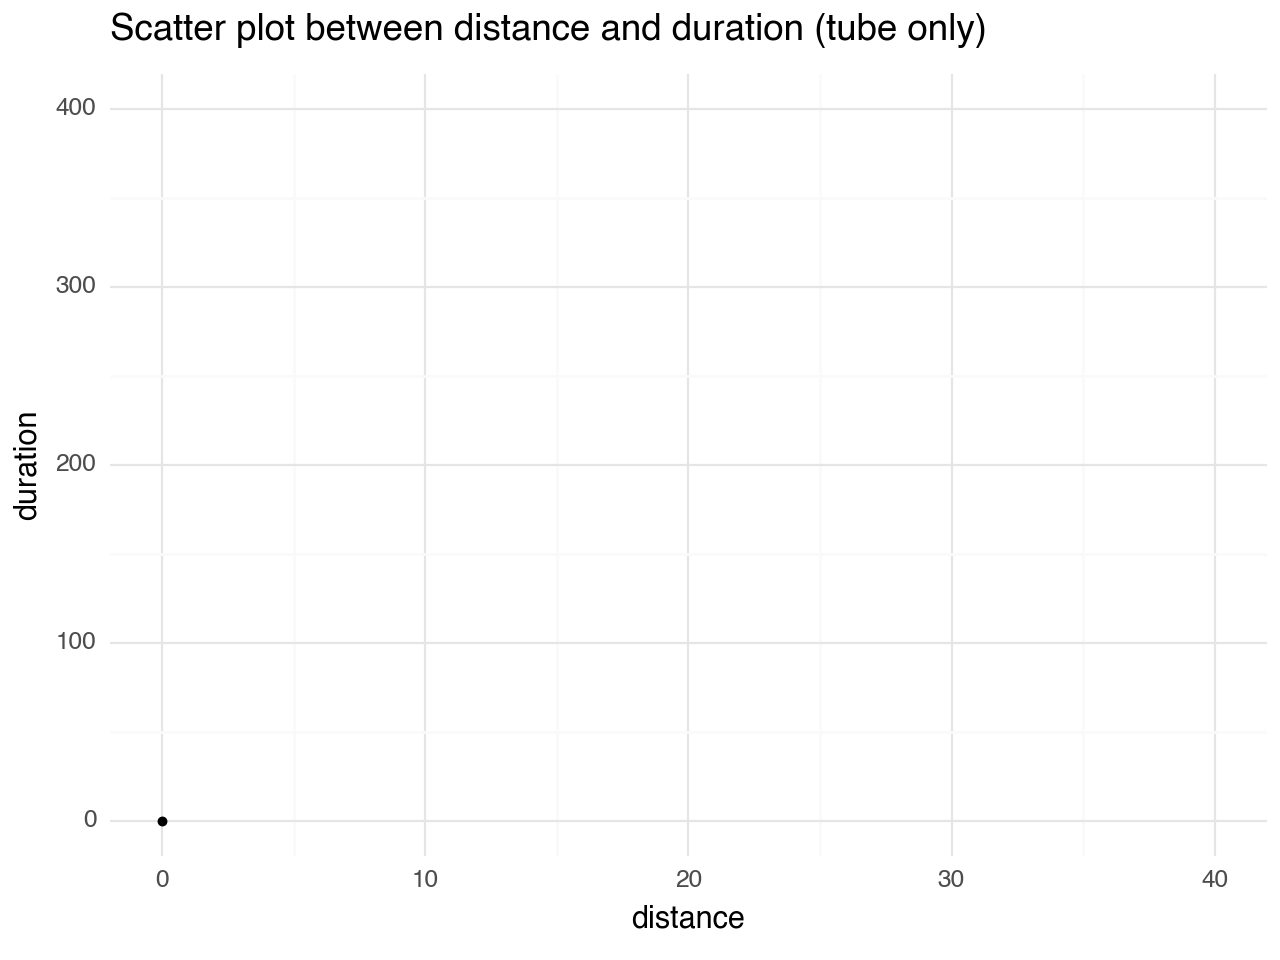

In [20]:
# Construct the scatter plot with data from the DataFrame 'df'.
plot = (
    ggplot(df, aes(x='distance', y='duration')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and duration (tube only)") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 100, 200, 300, 400], limits=(0, 400))
)

print(plot)

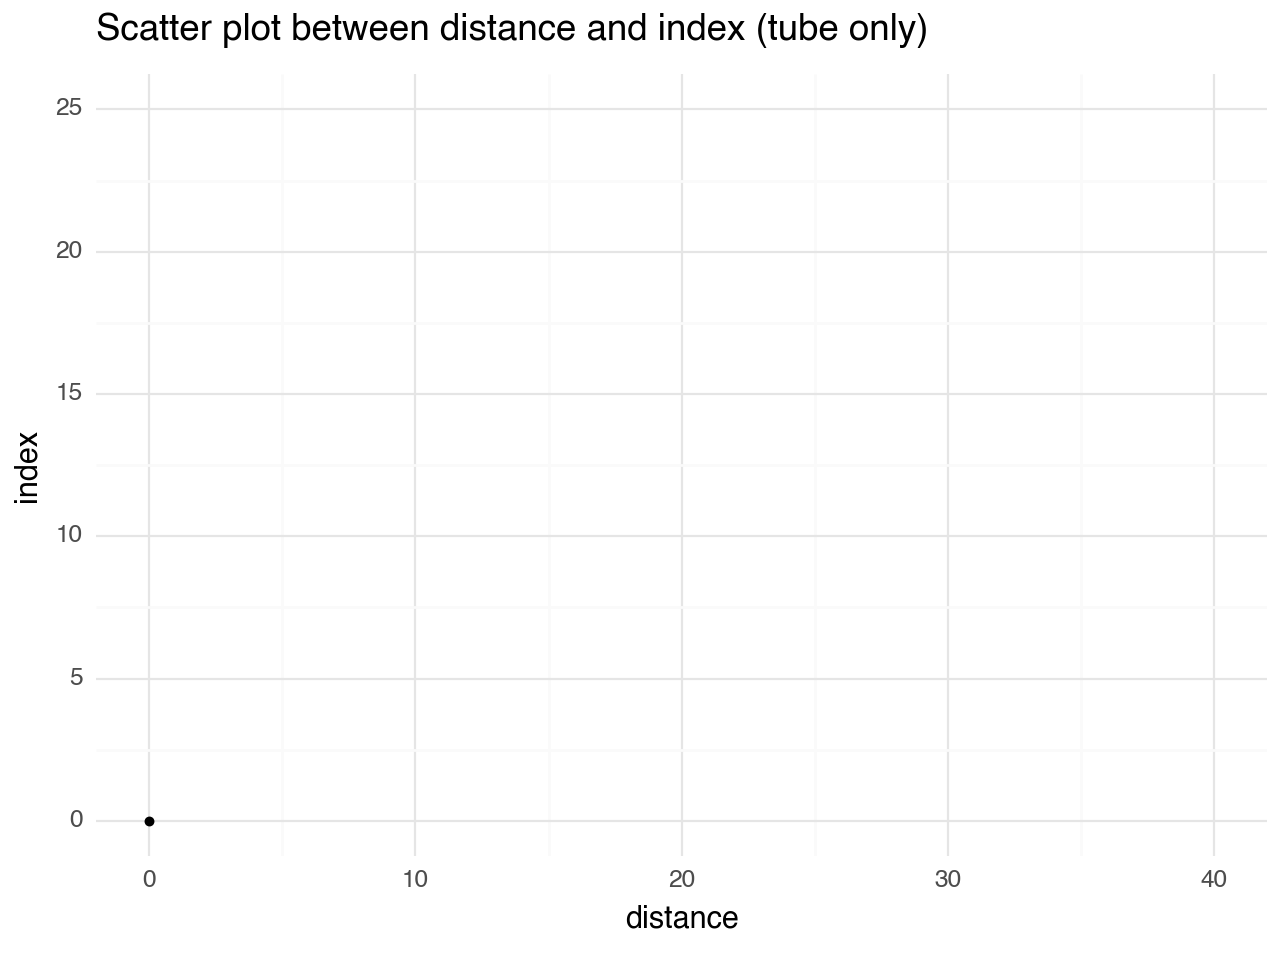

In [21]:
# Create the scatter plot with the DataFrame 'df', mapping 'distance' to the x-axis and 'index' to the y-axis.
plot = (
    ggplot(df, aes(x='distance', y='index')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and index (tube only)") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 5, 10, 15, 20, 25], limits=(0, 25))
)

print(plot)

## Buses only

In [22]:
buses = [['longitude', 'latitude', 'duration', 'distance', 'index', 'color']] # Initialize a list to store bus journey data, including longitude, latitude, duration, distance, index, and color.
base_row = [51.5134, -0.0890, 0, 0, 0, '0.1,0.8,0'] # Set up a base row with predefined values for a reference location.
buses.append(base_row)

In [23]:
base_location = [51.5134, -0.0890] # Define the base location's coordinates.
current_location = [0,0] # Initialize the current location with placeholder values.
y = 1
# Nested loops to iterate through a grid of points around the base location.
for x in range(20):
    for y in range(40):   
        # Calculate the current location's coordinates based on the loop counters and offsets.
        current_location[0] = base_location[0] - 0.02 * 10 + 0.02 * (x+1)
        current_location[1] = base_location[1] - 0.02 * 20 + 0.02 * (y+1)
        
        # Construct the URL for the TFL API, specifying 'bus' as the mode and including the current coordinates.
        current_url = "https://api.tfl.gov.uk/journey/journeyresults/" + str(current_location[0]) + "," + str(current_location[1]) + "/to/51.5134,-0.0890?mode=bus&20240303?app_id={{app_id}}&app_key="
        
        current_row = [current_location[0], current_location[1]]
        
        try:
            duration = get_duration(current_url) # Attempt to fetch the journey duration via the API.
        except KeyError:
            y = 1
            continue
        except ValueError:
            y = 1
            continue
        
        try:
            # Calculate the index and distance for the current location using predefined functions.
            index = get_index(current_location, base_location, duration) 
            distance = geopy.distance.geodesic(current_location, base_location).km
            color = get_color_from_index(index) # Determine the color based on the efficiency index.
        except ZeroDivisionError:
            color = '1,0,1' # Assign a fallback color in case of division by zero, indicating the base location itself.
        
        # Append the calculated metrics to 'a' and then add 'a' to the 'buses' list.
        current_row.extend([duration, distance, index, color])
        buses.append(current_row)

[51.3334, -0.469]
[51.3334, -0.449]
[51.3334, -0.429]
[51.3334, -0.409]
[51.3334, -0.389]
[51.3334, -0.369]
[51.3334, -0.349]
[51.3334, -0.32899999999999996]
[51.3334, -0.309]
[51.3334, -0.289]
[51.3334, -0.269]
[51.3334, -0.249]
[51.3334, -0.22899999999999998]
[51.3334, -0.20899999999999996]
[51.3334, -0.189]
[51.3334, -0.16899999999999998]
[51.3334, -0.14899999999999997]
[51.3334, -0.129]
[51.3334, -0.10899999999999999]
[51.3334, -0.08899999999999997]
[51.3334, -0.069]
[51.3334, -0.04899999999999999]
[51.3334, -0.02899999999999997]
[51.3334, -0.009000000000000008]
[51.3334, 0.01100000000000001]
[51.3334, 0.031000000000000028]
[51.3334, 0.051000000000000045]
[51.3334, 0.07100000000000006]
[51.3334, 0.09099999999999997]
[51.3334, 0.11099999999999999]
[51.3334, 0.131]
[51.3334, 0.15100000000000002]
[51.3334, 0.17100000000000004]
[51.3334, 0.19100000000000006]
[51.3334, 0.21100000000000008]
[51.3334, 0.23099999999999998]
[51.3334, 0.251]
[51.3334, 0.271]
[51.3334, 0.29100000000000004]
[5

KeyboardInterrupt: 

In [ ]:
# Saving Bus Data to CSV
df = pd.DataFrame(buses)
df.to_csv('data/buses.csv', index=False, header = None)

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


0                                     0.1,0.8,0
1                                 1, 0.98, 0.98
2                                 1, 0.98, 0.98
3                                 1, 0.98, 0.98
4                                 1, 0.98, 0.98
                         ...                   
783    1, 0.7843137254901961,0.7843137254901961
784    1, 0.7843137254901961,0.7843137254901961
785    1, 0.9019607843137255,0.9019607843137255
786                               1, 0.98, 0.98
787                               1, 0.98, 0.98
Name: color, Length: 788, dtype: object


<Axes: >

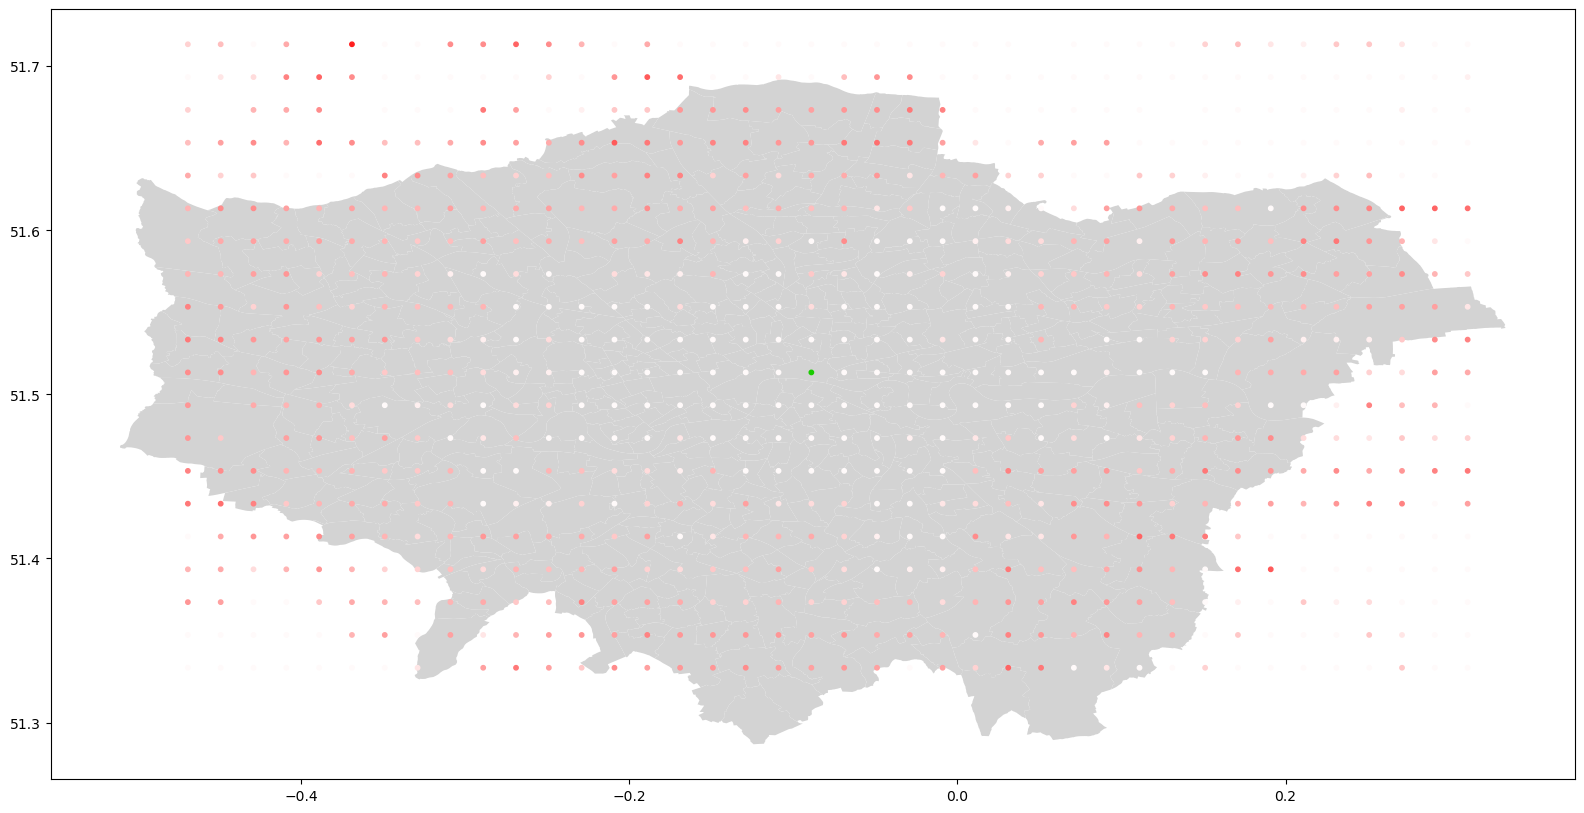

In [55]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load the geographical data of London's wards from a shapefile.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Convert the geometries in the GeoDataFrame to the WGS84 coordinate reference system for GPS compatibility.

df = pd.read_csv("data/buses.csv", delimiter=',', skiprows=0, low_memory=False) # Reload the bus data from the previously saved CSV file into a new DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London using a light grey color for the wards.

geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])] # Create Point geometries from the latitude and longitude columns for plotting.
gdf = GeoDataFrame(df, geometry=geometry) # Combine the DataFrame with these geometries into a GeoDataFrame for spatial plotting.

# Convert color column strings to RGB float tuples for visualization.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['color']]

# Overlay the bus data on the map, using the specified colors.
gdf.plot(
    ax = ax,
    markersize=10,
    color = gdf['color']
)

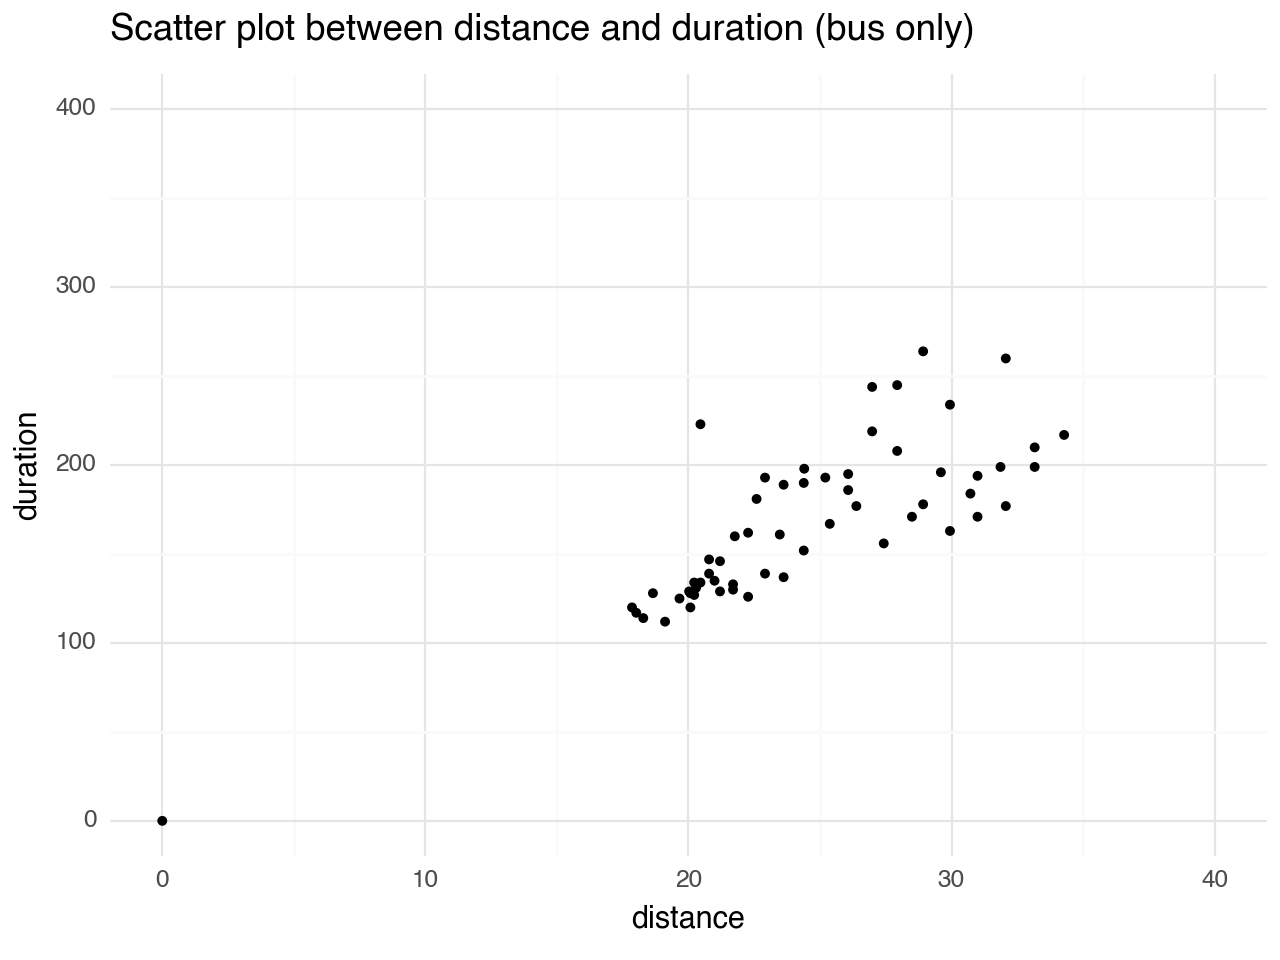

In [26]:
# Create a scatter plot of distance against duration for bus journeys.
plot = (
    ggplot(df, aes(x='distance', y='duration')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and duration (bus only)") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 100, 200, 300, 400], limits=(0, 400))
)

print(plot)

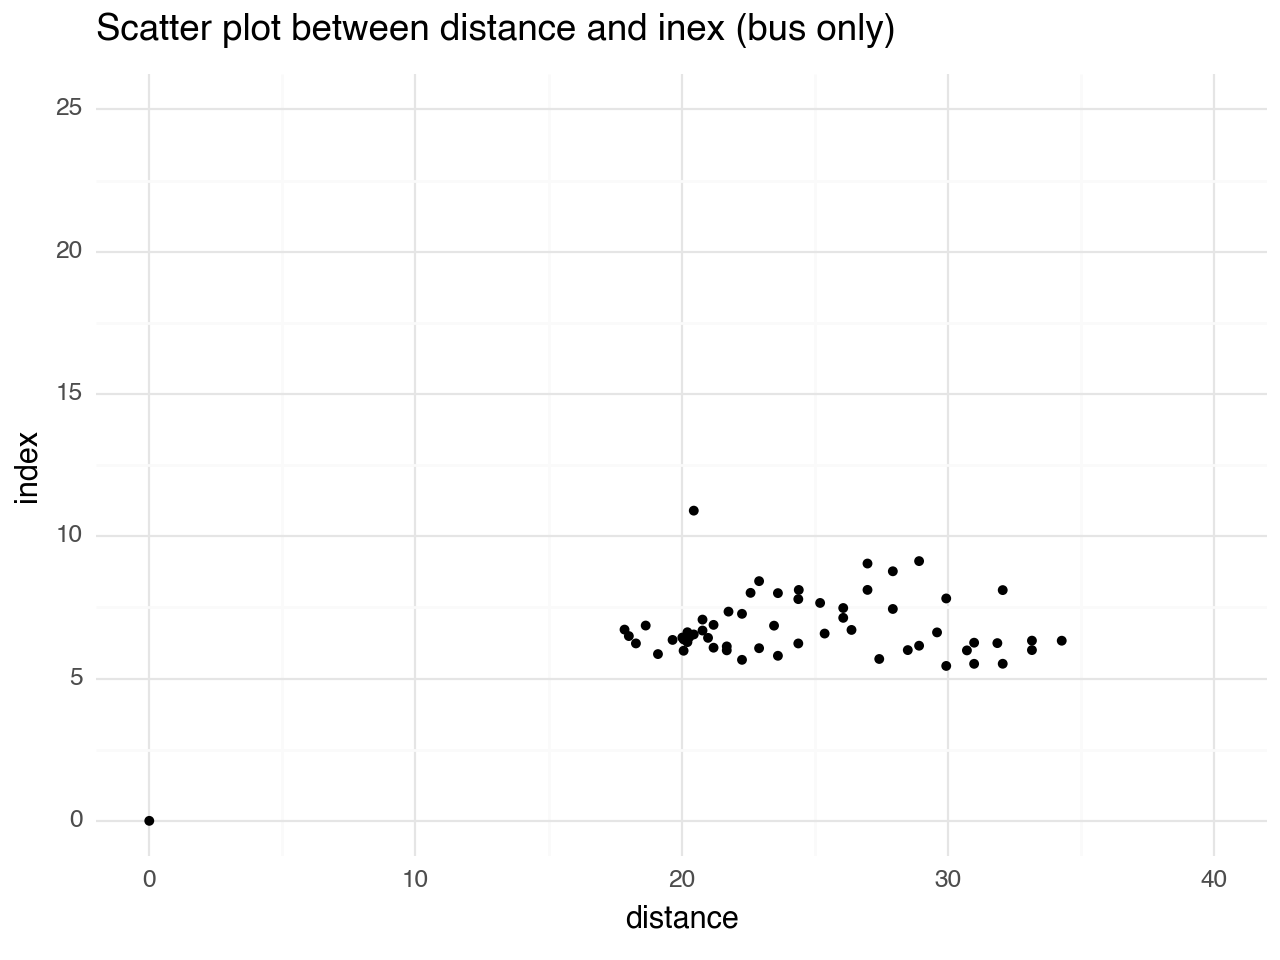

In [27]:
# Create a scatter plot of distance against the efficiency index for bus journeys.
plot = (
    ggplot(df, aes(x='distance', y='index')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and inex (bus only)") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 5, 10, 15, 20, 25], limits=(0, 25))
)

print(plot)

### Getting traffic data

In [2]:
def clean_and_save_csv(file_name, year): # Function to clean the 'en/ex' column and save the CSV file
    # Read the CSV file
    df = pd.read_csv(file_name)
    # Clean 'en/ex' column
    df['en/ex'] = df['en/ex'].astype(str).str.replace(',', '').str.strip()
    df['en/ex'] = pd.to_numeric(df['en/ex'], errors='coerce')   # Convert to numeric, coercing errors to NaN
    df['en/ex'] = df['en/ex'].fillna(0).astype(int)              # Replace NaNs with 0 and convert to int
    selected_columns = ['NLC', 'Station', 'en/ex']
    df_filtered = df[selected_columns]
    # Save the cleaned data back to CSV
    cleaned_file_name = f"data/Traffic/Cleaned_AnnualisedEntryExit_{year}.csv"
    df_filtered.to_csv(cleaned_file_name, index=False)
    
    return cleaned_file_name  # Return the file name of the cleaned file

In [3]:
def get_color_from_average_traffic(average_traffic):
    # 78840000, 280000
    r_and_g_value = 1 - (average_traffic / 20000000)
    if r_and_g_value < 0: 
        r_and_g_value = 0
    # Construct an RGB value string, keeping the blue component constant.
    RGB_value = str(r_and_g_value) + ',' + str(r_and_g_value) + ',1'
    return(RGB_value)

In [4]:
def load_data(year): # Loading and Cleaning Data per Year
    file_path = f'data/Traffic/Cleaned_AnnualisedEntryExit_{year}.csv'
    df = pd.read_csv(file_path)
    df['en/ex'] = pd.to_numeric(df['en/ex'], errors='coerce')
    df = df.dropna(subset=['en/ex'])
    df.rename(columns={'en/ex': str(year)}, inplace=True)
    df = df.drop_duplicates(subset=['NLC'])
    return df

In [10]:
def clean_station_name(name):
    item = name.replace(' LU','')
    return item

In [11]:
csv_files = [
    'raw_data/AnnualisedEntryExit_2016.csv', 
    'raw_data/AnnualisedEntryExit_2017.csv', 
    'raw_data/AnnualisedEntryExit_2018.csv', 
    'raw_data/AnnualisedEntryExit_2019.csv',
    'raw_data/AC2020_AnnualisedEntryExit.csv',
    'raw_data/AC2021_AnnualisedEntryExit.csv',
    'raw_data/AC2022_AnnualisedEntryExit.csv'
]

x = 2016

for csv_file in csv_files: # Clean and save each CSV file
    try:
        cleaned_file = clean_and_save_csv(csv_file, x)
        print(f"Cleaned file saved to: {cleaned_file}")
        x+=1
    except FileNotFoundError as e:
        print(f"File not found: {csv_file}. Please check the file name and path.")

Cleaned file saved to: data/Traffic/Cleaned_AnnualisedEntryExit_2016.csv
Cleaned file saved to: data/Traffic/Cleaned_AnnualisedEntryExit_2017.csv
Cleaned file saved to: data/Traffic/Cleaned_AnnualisedEntryExit_2018.csv
Cleaned file saved to: data/Traffic/Cleaned_AnnualisedEntryExit_2019.csv
Cleaned file saved to: data/Traffic/Cleaned_AnnualisedEntryExit_2020.csv
Cleaned file saved to: data/Traffic/Cleaned_AnnualisedEntryExit_2021.csv
Cleaned file saved to: data/Traffic/Cleaned_AnnualisedEntryExit_2022.csv


In [12]:
# Load data for each year
dfs = {year: load_data(year) for year in range(2016, 2023)}

# Merge the dataframes while ensuring no duplicate column names
df_station_traffic = None
for year, df in dfs.items():
    if df_station_traffic is None:
        df_station_traffic = df
    else:
        # Before merging, rename overlapping columns except for the 'Station' column
        df['Station'] = df['Station'].apply(clean_station_name)
        df = df.rename(columns={col: f"{col}_{year}" for col in df.columns if col not in ['Station', str(year)]})
        df_station_traffic = pd.merge(df_station_traffic, df, on='Station', how='outer', suffixes=('', f'_{year}'))

# Calculate the average traffic across all years and determine color codes.
df_station_traffic['Average_traffic'] = ((df_station_traffic['2017'] + df_station_traffic['2018'] + df_station_traffic['2019'] + df_station_traffic['2020'] + df_station_traffic['2021'] + df_station_traffic['2022'])) / 7
df_station_traffic['Colors'] = df_station_traffic['Average_traffic'].apply(get_color_from_average_traffic)

In [13]:
# Select and rearrange the columns for the final output DataFrame.
output_columns = ['Station'] + [str(year) for year in range(2016, 2023)] + ['Average_traffic'] + ['Colors']
df_station_traffic_merged = df_station_traffic[output_columns]

Merge with stations.csv

In [14]:
station_locations = pd.read_csv('raw_data/station_locations.csv')

# Rename the 'Name' column to 'Station' for consistency with the traffic data.
station_locations = station_locations.rename(columns={'Name': 'Station'})

# Merge the traffic data with station locations on the 'Station' column.
df_station_traffic_merged = df_station_traffic_merged.merge(station_locations, left_on='Station', right_on='Station')

# Save the merged DataFrame to a CSV file for future use.
df_station_traffic_merged.to_csv('data/station_traffic_merged.csv') 

In [15]:
df_station_traffic_merged.head(100)

,Station,2016,2017,2018,2019,2020,2021,2022,Average_traffic,Colors,X,Y
0,Acton Town,6274649.0,5731527.0,5794685.0,6186555.0,3568528.0,2902697.0,4931972.0,4.159423e+06,"0.7920288285714285,0.7920288285714285,1",-0.280251,51.502750
1,Aldgate,8009494.0,8459234.0,9218140.0,9956600.0,2775844.0,3525128.0,6902494.0,5.833920e+06,"0.708304,0.708304,1",-0.075614,51.514272
2,Aldgate East,13434630.0,13262408.0,13707738.0,14148654.0,3144899.0,5611130.0,10229488.0,8.586331e+06,"0.57068345,0.57068345,1",-0.072287,51.515233
3,Alperton,3174845.0,2896391.0,2796159.0,2858439.0,2064990.0,1345253.0,2302973.0,2.037744e+06,"0.8981128214285714,0.8981128214285714,1",-0.299487,51.540695
4,Amersham,2360700.0,2215502.0,2130207.0,2350099.0,863361.0,946577.0,1657141.0,1.451841e+06,"0.92740795,0.92740795,1",-0.607479,51.674150
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Heathrow Terminal 4,2278746.0,2146778.0,2127743.0,2125220.0,0.0,0.0,1232766.0,1.090358e+06,"0.9454820928571428,0.9454820928571428,1",-0.446059,51.458553
96,Hendon Central,8130263.0,7420133.0,7297644.0,7190413.0,3385014.0,2933496.0,4941336.0,4.738291e+06,"0.7630854571428571,0.7630854571428571,1",-0.226496,51.583294
97,High Barnet,3647152.0,4062201.0,4014753.0,4047339.0,2028542.0,1826421.0,3172741.0,2.736000e+06,"0.8632000214285714,0.8632000214285714,1",-0.194751,51.650601
98,High Street Kensington,13103200.0,12115781.0,11889198.0,11691230.0,3574133.0,4454568.0,8535039.0,7.465707e+06,"0.62671465,0.62671465,1",-0.192503,51.500673


### Drawing station traffic on top of the first map

In [77]:
# Load London's ward boundaries as a GeoDataFrame and set its coordinate system to WGS84.
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') 
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'})



'''
Optimise:
# Load London's ward boundaries as a GeoDataFrame and set its coordinate system to WGS84.
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp')
london_map['geometry'] = london_map['geometry'].to_crs({'init': 'epsg:4326'})
'''

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


"\nOptimise:\n# Load London's ward boundaries as a GeoDataFrame and set its coordinate system to WGS84.\nlondon_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp')\nlondon_map['geometry'] = london_map['geometry'].to_crs({'init': 'epsg:4326'})\n"

<Axes: >

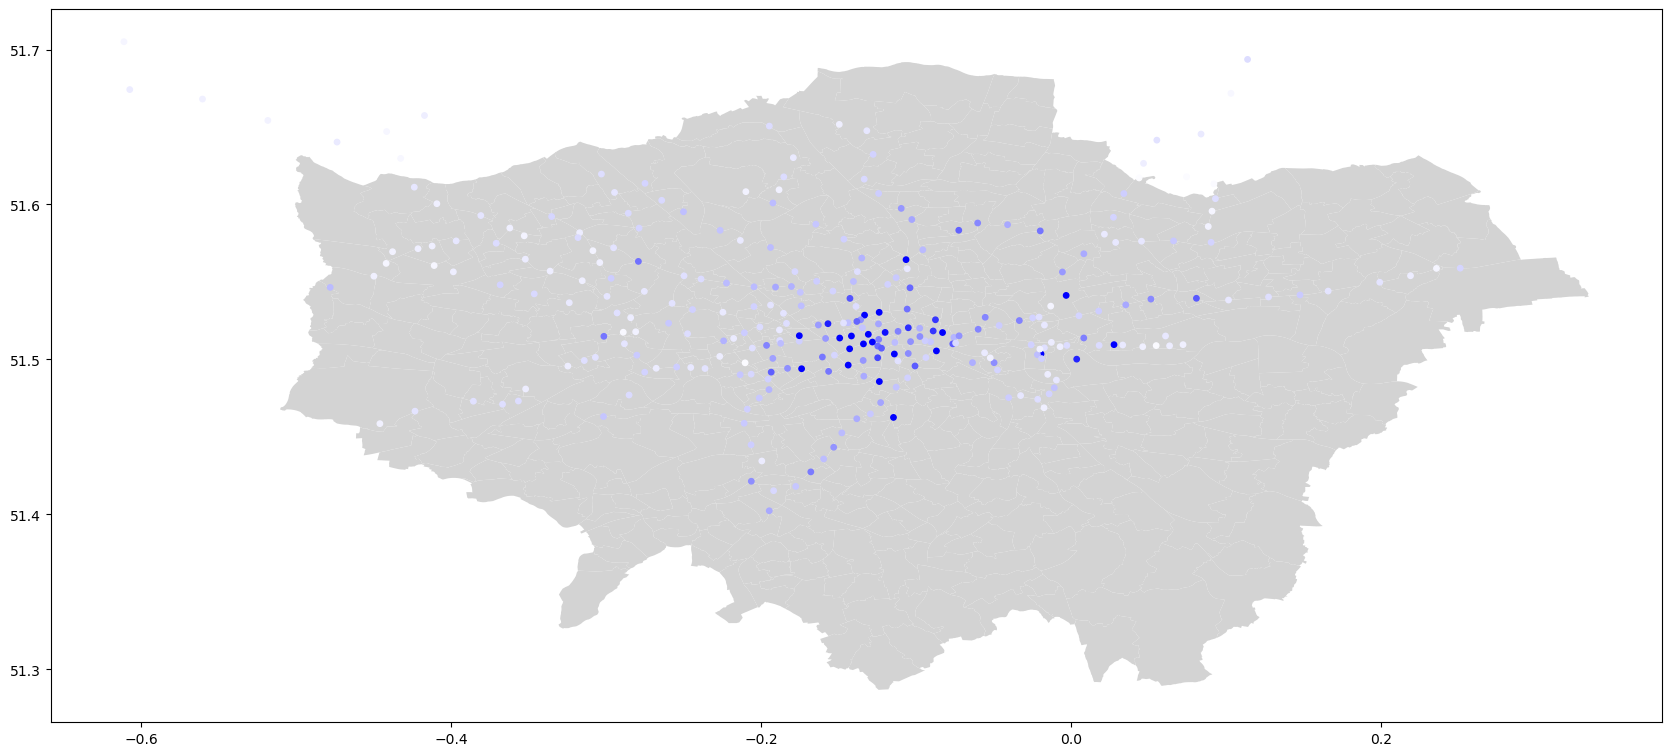

In [78]:
# Load the merged station traffic data.
df = pd.read_csv("data/station_traffic_merged.csv", delimiter=',', skiprows=0, low_memory=False)

ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London wards in light grey.
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])] # Create Point geometries from the station coordinates.
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame from the station data, enabling spatial visualization.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['Colors']] # Convert the 'Colors' column to RGB tuples for plotting.

# Plot the stations on the map, coloring them based on the traffic data.
gdf.plot(
    ax = ax,
    markersize=15,
    color = gdf['color']
)

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


Text(0.5, 1.0, 'Bank')

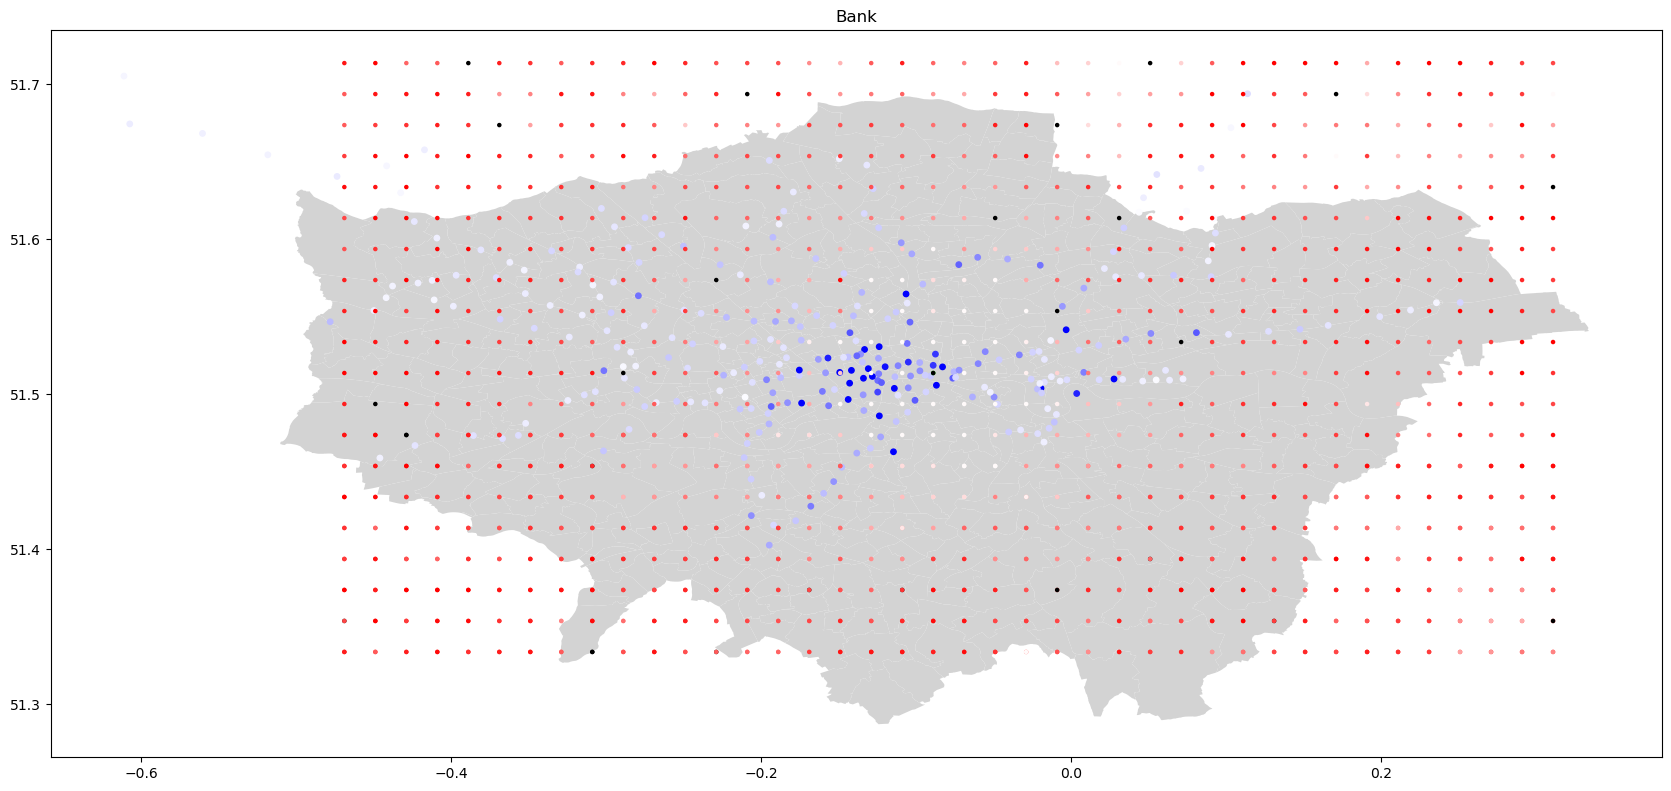

In [18]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load the shapefile containing London's ward boundaries into a GeoDataFrame.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Convert the geometries to the WGS84 coordinate system (EPSG:4326) for compatibility with GPS coordinates.

df = pd.read_csv("data/station_traffic_merged.csv", delimiter=',', skiprows=0, low_memory=False) # Load the merged station traffic data from a CSV file.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London with wards colored in light grey.
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])] # Convert the station locations (X, Y) into Point geometries for plotting.
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame with the station traffic data and associated geometries.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['Colors']] # Convert the 'Colors' column to RGB tuples for coloring the station points.

# Plot the stations on the map, using the calculated colors and a marker size of 15.
gdf.plot(
    ax = ax,
    markersize=15,
    color = gdf['color']
)

df_2 = pd.read_csv("data/locations.csv", delimiter=',', skiprows=0, low_memory=False)
geometry = [Point(xy) for xy in zip(df_2['latitude'], df_2['longitude'])]
gdf_2 = GeoDataFrame(df_2, geometry=geometry) # Create a GeoDataFrame with the additional location data and associated geometries.
gdf_2['color'] = [tuple(map(float, item.split(','))) for item in df_2['color']] # Convert the 'color' column to RGB tuples for coloring these additional points.

# Overlay these additional locations on the map, using a smaller marker size (5) for distinction.
gdf_2.plot(
    ax = ax,
    markersize=5,
    color = gdf_2['color']
)

ax.set_title('Bank')

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


Text(0.5, 1.0, 'Canary Wharf')

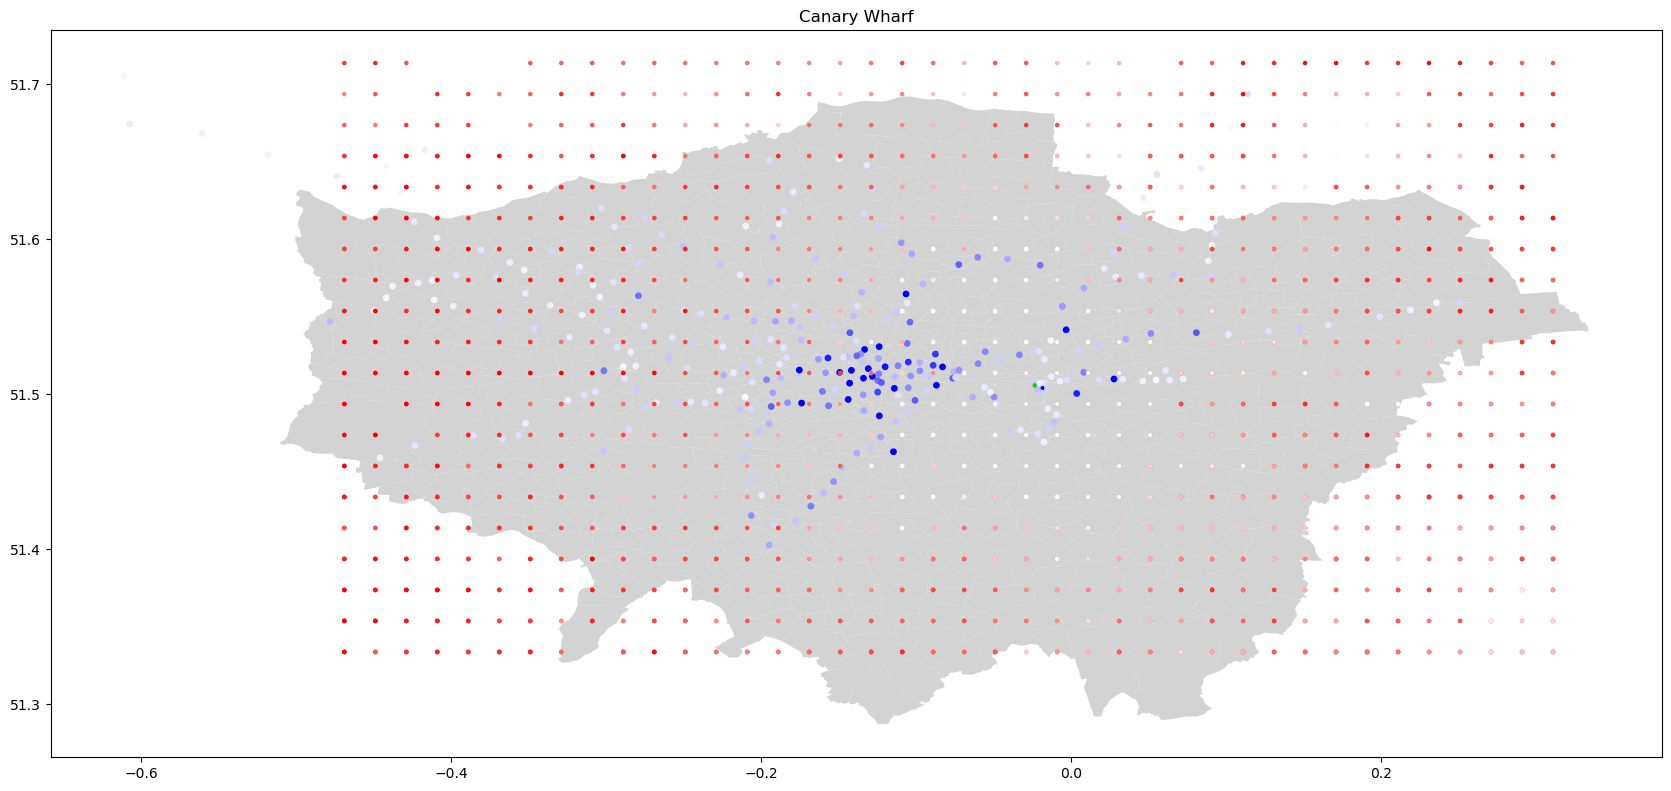

In [17]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load the shapefile containing London's ward boundaries into a GeoDataFrame.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Convert the geometries to the WGS84 coordinate system (EPSG:4326) for compatibility with GPS coordinates.

df = pd.read_csv("data/station_traffic_merged.csv", delimiter=',', skiprows=0, low_memory=False) # Load the merged station traffic data from a CSV file.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London with wards colored in light grey.
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])] # Convert the station locations (X, Y) into Point geometries for plotting.
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame with the station traffic data and associated geometries.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['Colors']] # Convert the 'Colors' column to RGB tuples for coloring the station points.

# Plot the stations on the map, using the calculated colors and a marker size of 15.
gdf.plot(
    ax = ax,
    markersize=15,
    color = gdf['color']
)

df_2 = pd.read_csv("data/canary.csv", delimiter=',', skiprows=0, low_memory=False)
geometry = [Point(xy) for xy in zip(df_2['latitude'], df_2['longitude'])]
gdf_2 = GeoDataFrame(df_2, geometry=geometry) # Create a GeoDataFrame with the additional location data and associated geometries.
gdf_2['color'] = [tuple(map(float, item.split(','))) for item in df_2['color']] # Convert the 'color' column to RGB tuples for coloring these additional points.

# Overlay these additional locations on the map, using a smaller marker size (5) for distinction.
gdf_2.plot(
    ax = ax,
    markersize=5,
    color = gdf_2['color']
)

ax.set_title('Canary Wharf')